In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from utils import load_annData,load_visium,processing,plot_grid_of_embeddings,rescale_annData

In [2]:
h5d="/gpfs/commons/home/ecordina/uST/github/slide_snake/out/decoderseq03/STARsolo/short_read/decoderseq/Solo.out/GeneFull/raw/matrix.h5ad"
slide_snake=sc.read_h5ad(h5d)
slide_snake.obs.index=[barcode[0]+barcode[1] for barcode in slide_snake.obs.index.str.split("_")]
barcodes=pd.read_csv("/gpfs/commons/home/ecordina/decoderseq/data/GSM7585158/output/GSM7585158_MOB-15-1.bc.intissue.txt",index_col=0,header=None,sep='\t')
slide_snake.obs=slide_snake.obs.join(barcodes,how='left')

/gpfs/commons/home/ecordina/.conda/envs/deconvolution/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [160]:
from skimage.io import imread
from skimage.transform import rescale
img=imread("/gpfs/commons/home/ecordina/decoderseq/data/GSM7585158/output/GSM7585158_MOB-15-1.png")
img=rescale(img,1/2,channel_axis=-1)

In [161]:
ma_y,ma_x=img.shape[1],img.shape[0]
list_=[ma_y*(slide_snake.obs[1])/np.max(slide_snake.obs[1]),ma_x*(50-slide_snake.obs[2])/np.max(slide_snake.obs[2])]
slide_snake.obsm["spatial"] = np.array(list_).T
slide_snake.uns['spatial']={}
slide_snake.uns['spatial']['images']={}
slide_snake.uns['spatial']['images']['HE']=img

In [162]:
adata_processed=processing(deepcopy(slide_snake))

/gpfs/commons/home/ecordina/.conda/envs/deconvolution/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/commons/home/ecordina/.conda/envs/deconvolution/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Normalized
log1pd
highly variable gened
pcad


2024-04-25 14:26:51.666081: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 14:27:12.916118: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


neighbored
leidend


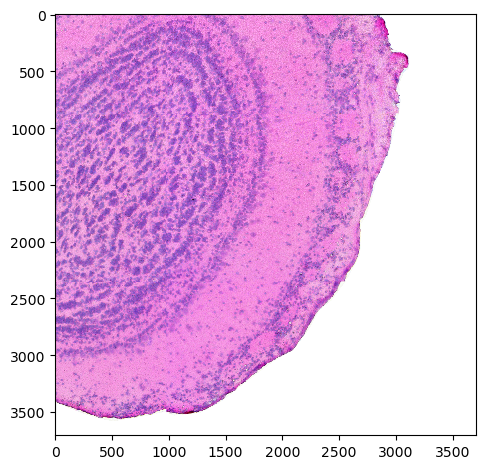

In [163]:
# adata60=load_annData("/gpfs/commons/home/ecordina/decoderseq/data/50decoder/GSM7585160/output/")
adata15=load_annData("/gpfs/commons/home/ecordina/decoderseq/data/GSM7585158/output/")
# visium=load_visium("/gpfs/commons/home/ecordina/decoderseq/data/10xMouse/")

In [164]:
# adata60_preprocess=processing(deepcopy(adata60))
# visium_preprocess=processing(deepcopy(visium))
adata15_preprocess=processing(deepcopy(adata15))

Normalized
log1pd
highly variable gened
pcad
neighbored
leidend


In [165]:
adata_processed.uns['spatial']["HE"]=adata_processed.uns['spatial']['images']["HE"]
adata15_preprocess.uns['spatial']["HE"]=adata15_preprocess.uns['spatial']['images']["HE"]

/gpfs/commons/home/ecordina/.conda/envs/deconvolution/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/gpfs/commons/home/ecordina/.conda/envs/deconvolution/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


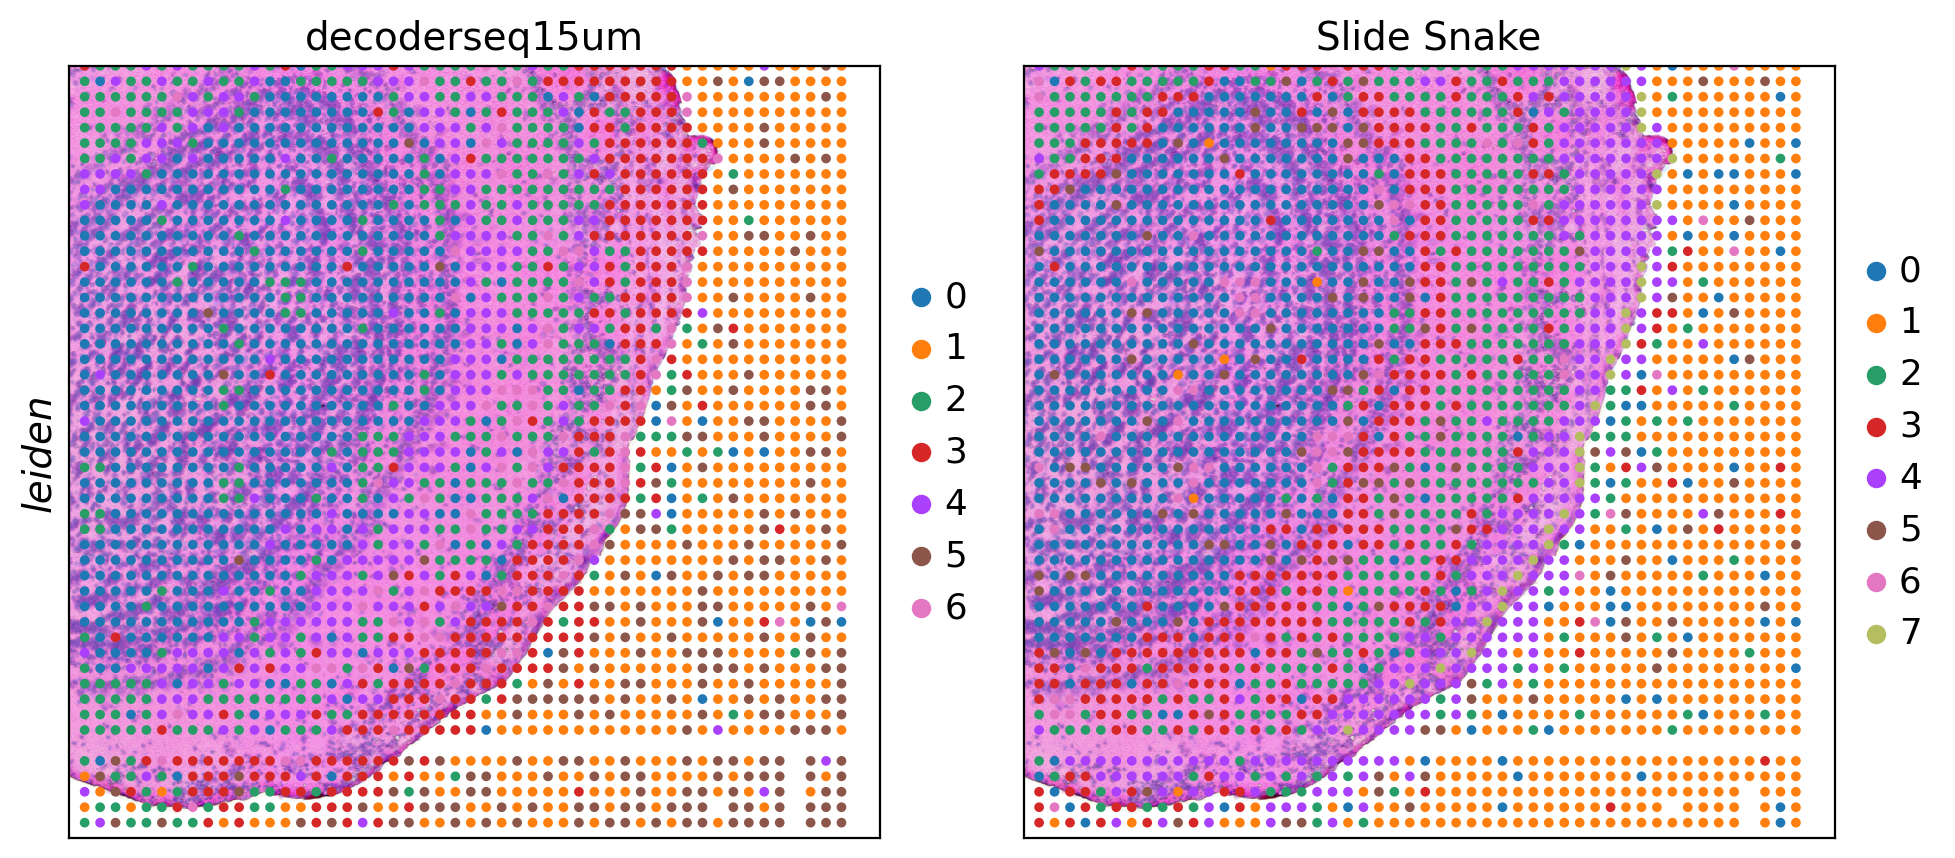

In [166]:

sc.set_figure_params(
    figsize=(4,4),
    transparent=True,
    dpi=100
)

plot_grid_of_embeddings(
    {"decoderseq15um":adata15_preprocess,"Slide Snake":adata_processed},
    color=['leiden'],
    same_scale=False,
    rescale_images=False,
    # plot_titles=meta["plot_title"],
    # size=5,
    basis='spatial'
)

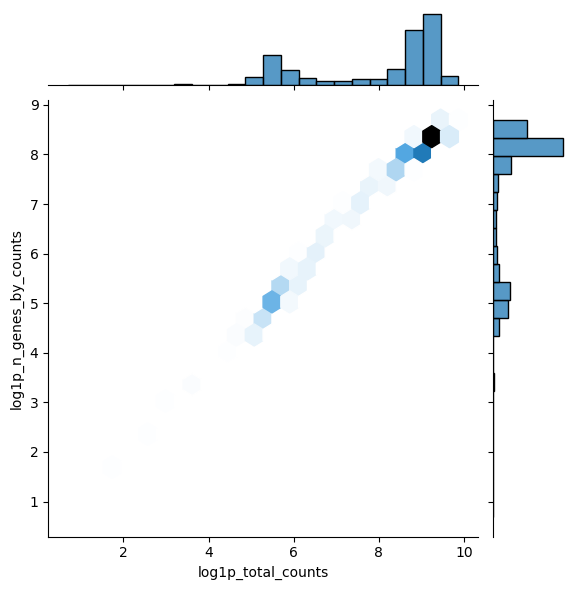

In [8]:
import scanpy as sc
import seaborn as sns

sc.pp.calculate_qc_metrics(slide_snake, inplace=True)
sns.jointplot(
    data=slide_snake.obs,
    x="log1p_total_counts",
    y="log1p_n_genes_by_counts",
    kind="hex",
)

<Axes: xlabel='n_genes_by_counts', ylabel='Count'>

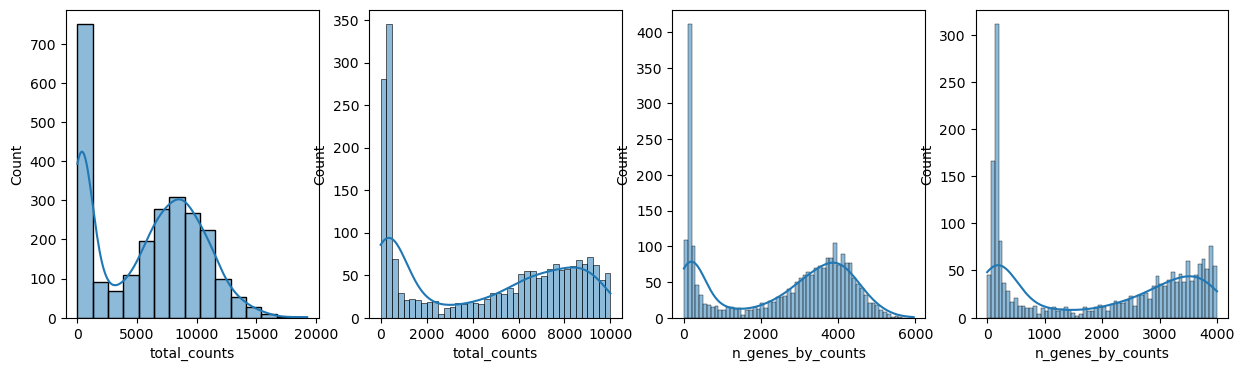

In [9]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(slide_snake.obs["total_counts"], kde=True, ax=axs[0])
sns.histplot(
    slide_snake.obs["total_counts"][slide_snake.obs["total_counts"] < 10000],
    kde=True,
    bins=40,
    ax=axs[1],
)
sns.histplot(slide_snake.obs["n_genes_by_counts"], kde=True, bins=60, ax=axs[2])
sns.histplot(
    slide_snake.obs["n_genes_by_counts"][slide_snake.obs["n_genes_by_counts"] < 4000],
    kde=True,
    bins=60,
    ax=axs[3],
)

In [10]:
sc.pp.filter_cells(slide_snake, min_counts=1000)
sc.pp.filter_cells(slide_snake, max_counts=35000)
#adata = adata[adata.obs["total_counts"] > 20].copy()
print(f"#cells after MT filter: {slide_snake.n_obs}")
# sc.pp.filter_genes(adata, min_cells=10)

/gpfs/commons/home/ecordina/.conda/envs/deconvolution/lib/python3.11/site-packages/anndata/_core/anndata.py:1908: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


#cells after MT filter: 1763


In [11]:
sc.pp.normalize_total(slide_snake, inplace=True)
sc.pp.log1p(slide_snake)
sc.pp.highly_variable_genes(slide_snake, n_top_genes=2000)

In [12]:
sc.pp.pca(slide_snake)
sc.pp.neighbors(slide_snake)
# sc.tl.umap(adata)
sc.tl.leiden(
    slide_snake, key_added="clusters", directed=False, n_iterations=2
)

2024-04-19 17:58:28.418552: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [ ]:
# plt.rcParams["figure.figsize"] = (4, 4)
# sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "clusters"], wspace=0.4)

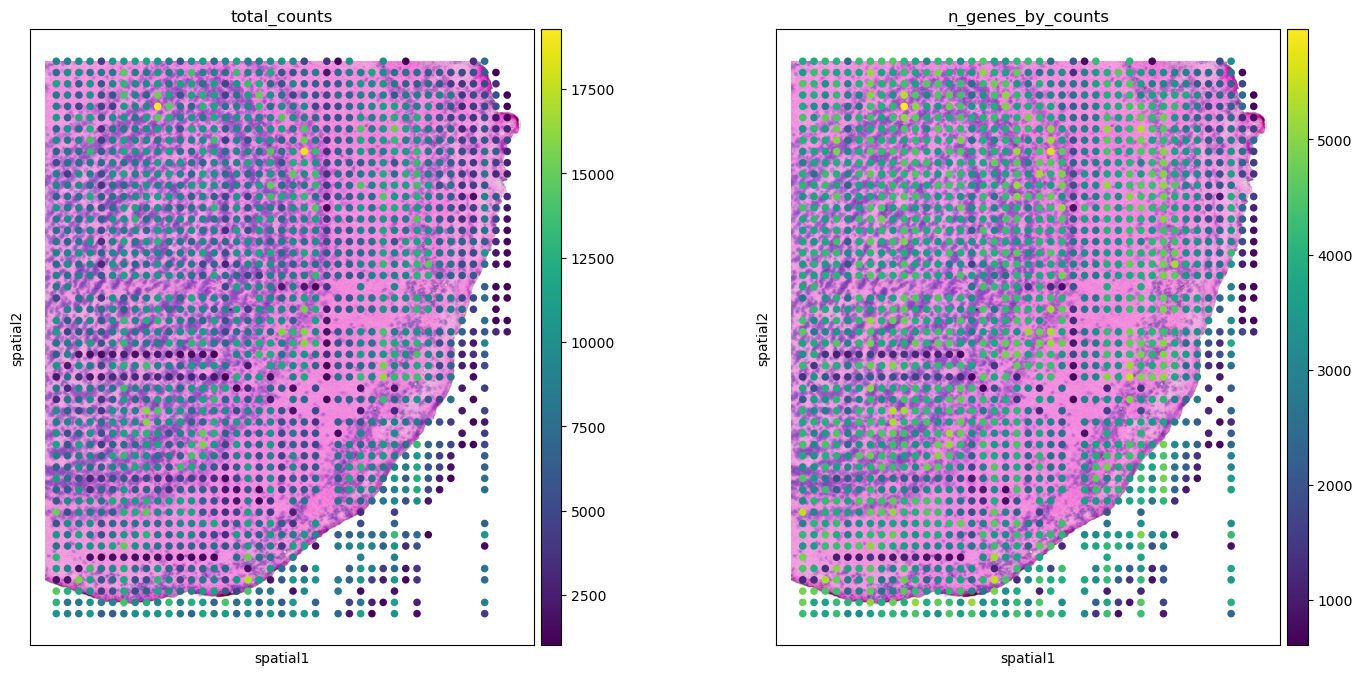

In [13]:
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(slide_snake,img=slide_snake.uns['spatial']['images']['HE'],scale_factor=1,spot_size=50,color=["total_counts", "n_genes_by_counts"])

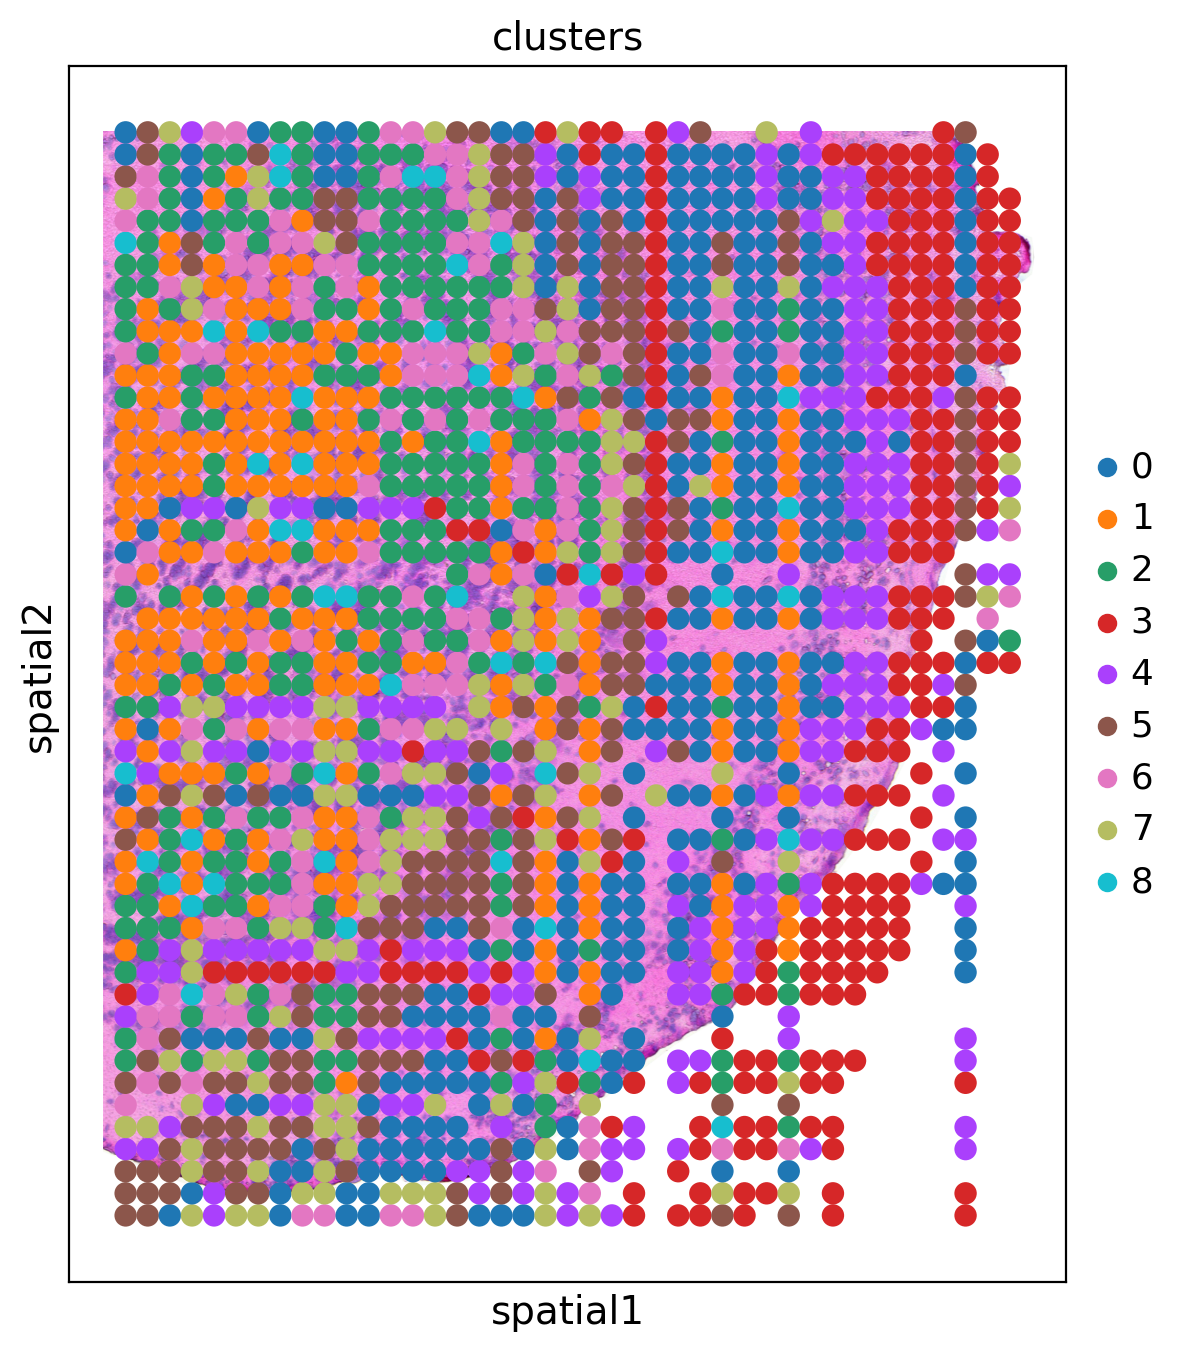

In [29]:
sc.pl.spatial(slide_snake,img=slide_snake.uns['spatial']['images']['HE'],scale_factor=1,spot_size=50, color="clusters", size=1.5)

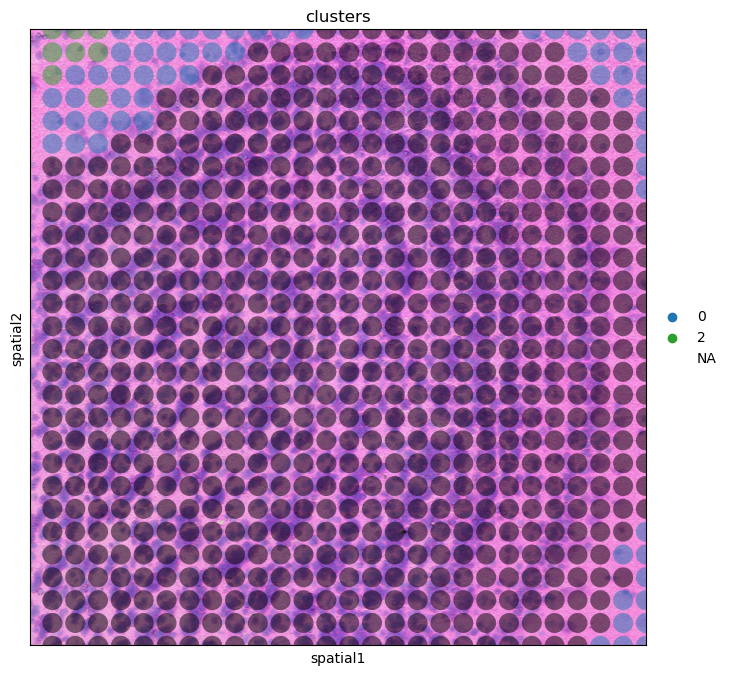

In [30]:
sc.pl.spatial(
    adata,
    img=adata.uns['spatial']['images']['HE'],
    spot_size=50,
    scale_factor=1,
    color="clusters",
    groups=["0", "2"],
    crop_coord=[0, 2000, 0, 2000],
    alpha=0.5,
    size=1.3,
)

categories: 0, 1, 2, etc.
var_group_labels: 0


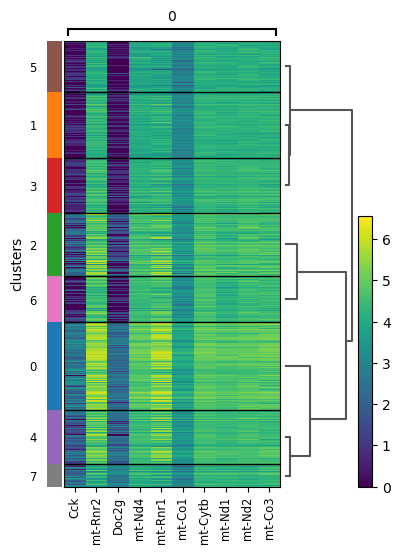

In [34]:
sc.tl.rank_genes_groups(adata, "clusters", method="t-test")
adata.var_names_make_unique()
sc.pl.rank_genes_groups_heatmap(adata, groups="0", n_genes=10, groupby="clusters")

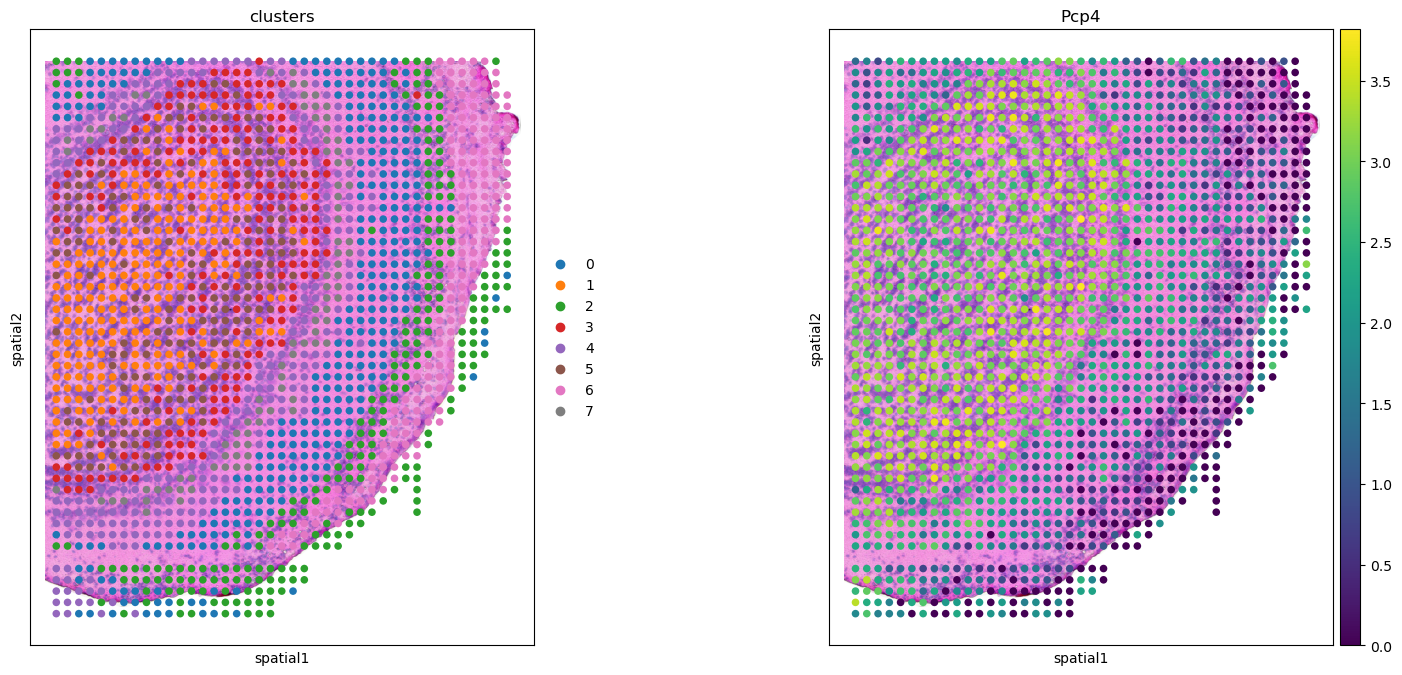

In [32]:
sc.pl.spatial(adata, img=adata.uns['spatial']['images']['HE'],scale_factor=1,spot_size=50,color=["clusters", "Pcp4"])

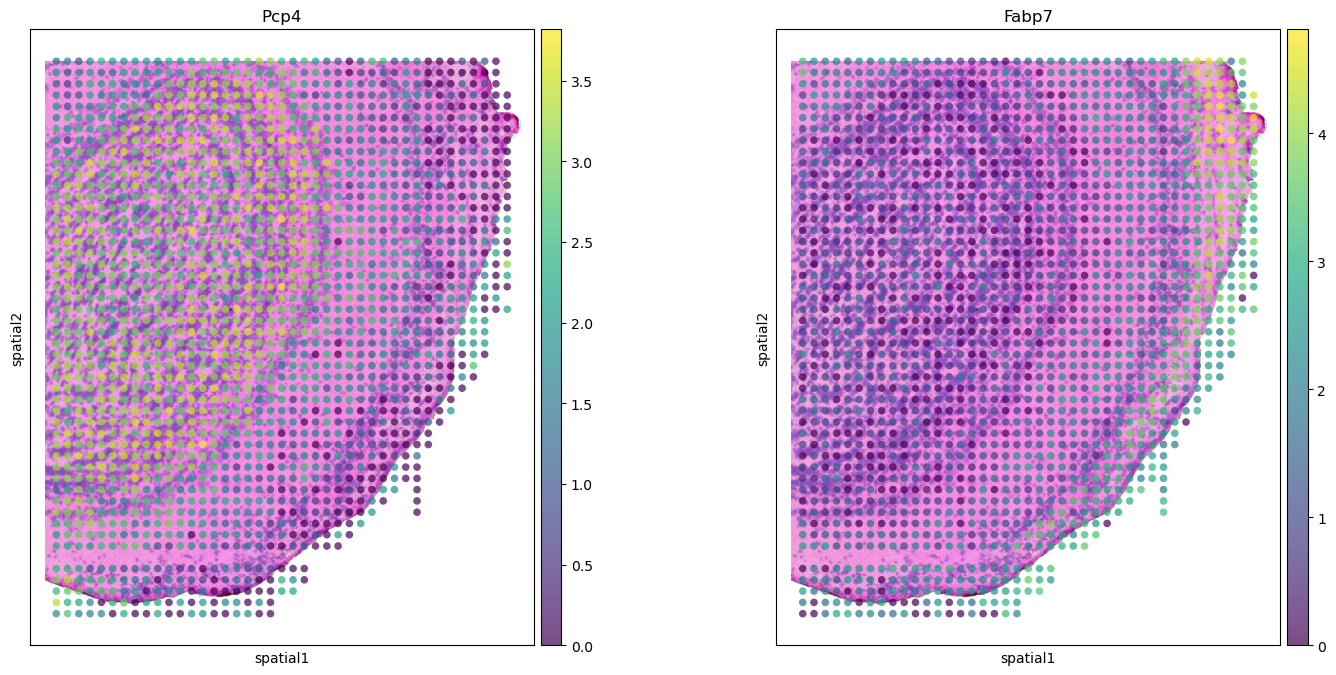

In [33]:
sc.pl.spatial(adata, img=adata.uns['spatial']['images']['HE'],scale_factor=1,spot_size=50,color=["Pcp4", "Fabp7"], alpha=0.7)

In [62]:
adata=ad.AnnData(slide_snake[barcodes['barcodes']].values.T)
adata.vars=pd.Series(features[1])
adata.var_names=pd.Series(features[1])
ma_y,ma_x=img.shape[1],img.shape[0]
list_=[ma_y*(barcodes["x"].values)/np.max(barcodes["x"].values),ma_x*(50-barcodes["y"].values)/np.max(barcodes["y"].values)]
adata.obsm["spatial"] = np.array(list_).T
adata.uns['spatial']={}
adata.uns['spatial']['images']={}
adata.uns['spatial']['images']['HE']=img

13 point missing


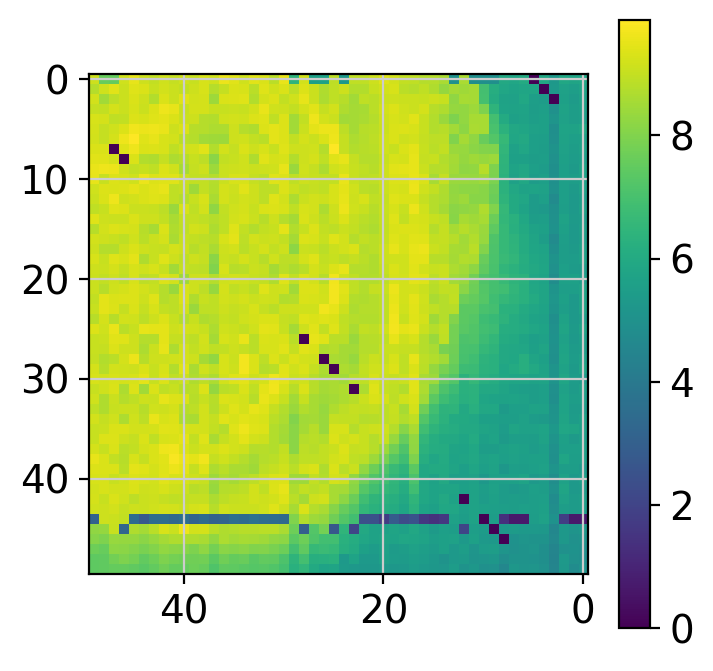

In [461]:
list_x=barcodes["x"].values-1
list_y=barcodes["y"].values-1
list2=np.array([49-list_x,list_y]).T
matrix=adata.X
not_there=[[i,j] for i in range(50) for j in range(50) if not any(np.equal(list2,[i,j]).all(1))]
print(len(not_there),"point missing")
sum_matrix=matrix.sum(axis=1).copy()[::-1]
for point in not_there:
    sum_matrix=np.insert(sum_matrix,49*point[0]+point[1],0)
final_matrix=np.log(sum_matrix.reshape((50,50)).T+1)
plt.imshow(final_matrix)
plt.gca().invert_xaxis()
plt.colorbar()



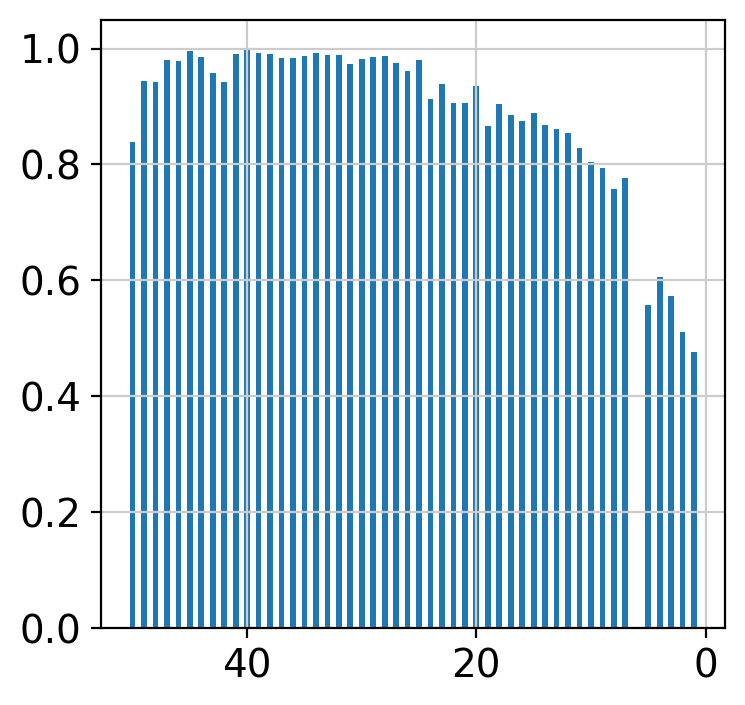

In [475]:
columns=np.sum(final_matrix,axis=0)
plt.bar(50-np.array(range(50)),(columns-np.min(columns))/(np.max(columns)-np.min(columns)),width=0.5)
plt.gca().invert_xaxis()

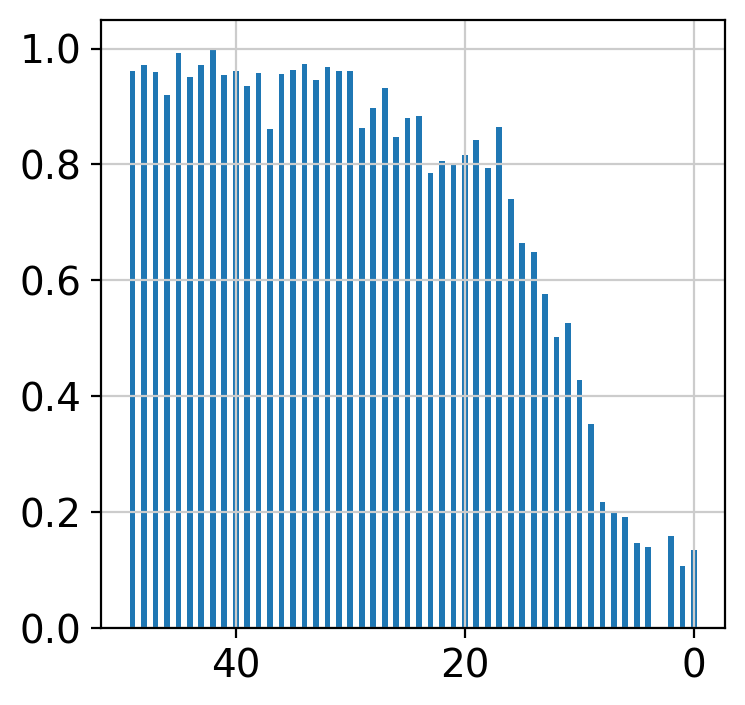

In [478]:
rows=np.sum(final_matrix,axis=1)
plt.bar(np.array(range(50)),(rows-np.min(rows))/(np.max(rows)-np.min(rows)),width=0.5)
plt.gca().invert_xaxis()